# GeoPandas
In this notebook, we will look at GeoPandas and how we can use it to visualize our OSM and GADM data.

In [39]:
import psycopg2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

We first establish a connection to our database

In [40]:
conn = psycopg2.connect(dbname="postgis", 
                 user="gsa2022", 
                 password="g5!V%T1Vmd", 
                 host="192.168.212.99", 
                 port=32771)

## Handling PostGIS Queries and GeoPandas Dataframe

Previously, we used pandas to read our sql queries through pd.read_sql. For GeoPandas, we use gpd.read_postgis

In [41]:
gpd.read_postgis?

In [42]:
#Lets query our gadm map first and store it as our ph_shp
ph_shp = gpd.read_postgis('''
SELECT *
FROM gadm.ph
''', con = conn, geom_col = 'geom')
ph_shp

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,type_2,engtype_2,cc_2,hasc_2,geom
0,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,Bayan|Munisipyo,Municipality,140101,PH.AB.BN,"MULTIPOLYGON (((120.62710 17.49300, 120.62177 ..."
1,2,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.2_1,Boliney,None,None,Bayan|Munisipyo,Municipality,140102,PH.AB.BL,"MULTIPOLYGON (((120.99042 17.39802, 120.98631 ..."
2,3,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.3_1,Bucay,None,None,Bayan|Munisipyo,Municipality,140103,PH.AB.BU,"MULTIPOLYGON (((120.70788 17.45395, 120.70621 ..."
3,4,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.4_1,Bucloc,None,None,Bayan|Munisipyo,Municipality,140104,PH.AB.BC,"MULTIPOLYGON (((120.78956 17.41699, 120.78922 ..."
4,5,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.5_1,Daguioman,None,None,Bayan|Munisipyo,Municipality,140105,PH.AB.DG,"MULTIPOLYGON (((120.92917 17.41307, 120.92464 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1642,1640,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.9_1,Naga,None,None,Bayan|Munisipyo,Municipality,98309,PH.ZS.NG,"MULTIPOLYGON (((122.77500 7.76833, 122.77528 7..."
1643,1645,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.14_1,Talusan,None,None,Bayan|Munisipyo,Municipality,98314,PH.ZS.TL,"MULTIPOLYGON (((122.91917 7.34111, 122.91861 7..."
1644,1641,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.10_1,Olutanga,None,None,Bayan|Munisipyo,Municipality,98310,PH.ZS.OU,"MULTIPOLYGON (((122.85805 7.27653, 122.85837 7..."
1645,1642,PHL,Philippines,PHL.81_1,Zamboanga Sibugay,None,PHL.81.11_1,Payao,None,None,Bayan|Munisipyo,Municipality,98311,PH.ZS.PY,"MULTIPOLYGON (((122.69195 7.46229, 122.69139 7..."


<AxesSubplot:>

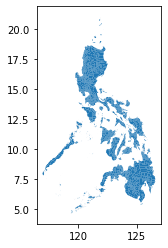

In [43]:
# Using GeoPandas, we can immediately visualize our object using .plot()
ph_shp.plot()

<AxesSubplot:>

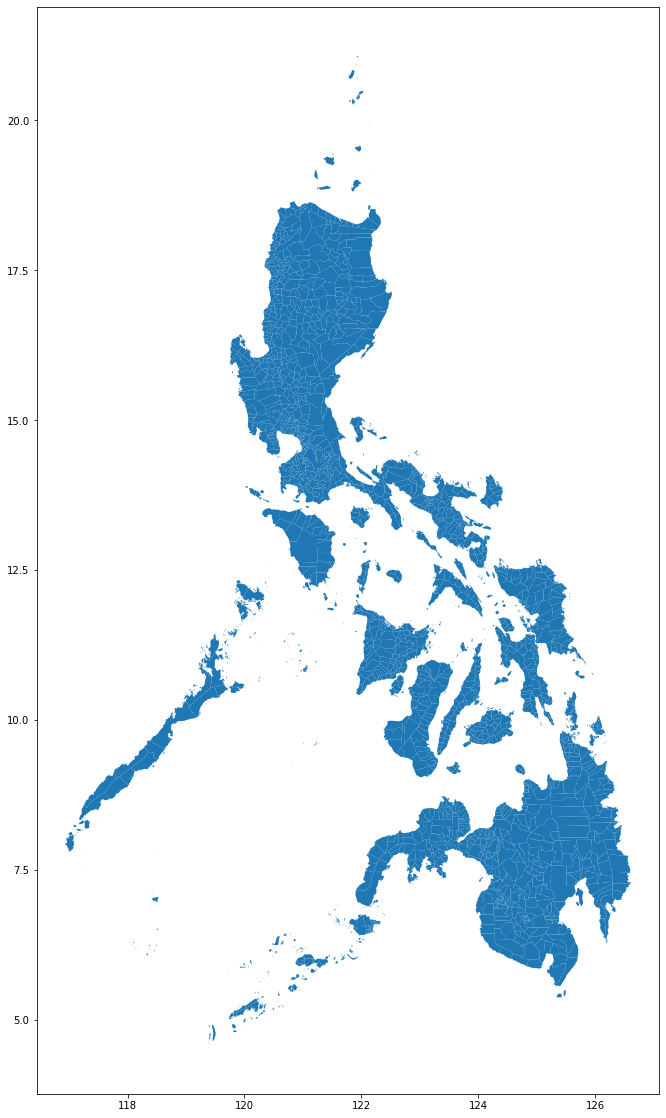

In [44]:
# GeoPandas uses matplotlib to visualize our map so we can use our matplotlib parameters such as figsize
ph_shp.plot(figsize=(20,20))

In [45]:
# Now let's read our osm points as mm_pts. Filter by looking at points insde 'Metropolitan Manila' and amenity != 'None'
mm_pts = gpd.read_postgis('''
SELECT p.*
FROM ph_point AS p
JOIN gadm.ph as g ON st_within(p.way, g.geom)
WHERE p.amenity != 'None' AND g.name_1 = 'Metropolitan Manila'
'''
, con = conn, geom_col = 'way'
)
mm_pts

,osm_id,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,...,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way
0,1323171902,None,None,None,None,None,None,None,place_of_worship,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06504 14.53979)
1,5055079422,None,None,None,None,None,None,None,nightclub,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06733 14.53969)
2,255058348,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06861 14.53961)
3,1323171838,None,None,None,None,None,None,None,place_of_worship,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06228 14.54403)
4,255071432,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06374 14.54548)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14909,4102699590,None,None,None,None,None,None,None,place_of_worship,None,...,None,None,None,None,None,None,None,None,None,POINT (120.99323 14.73031)
14910,4771230923,None,None,Lot 20,None,None,None,None,car_rental,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01211 14.72981)
14911,5601567148,None,None,None,None,None,None,None,place_of_worship,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01246 14.73250)
14912,4607797789,None,None,None,None,None,None,None,shelter,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01159 14.73729)


<AxesSubplot:>

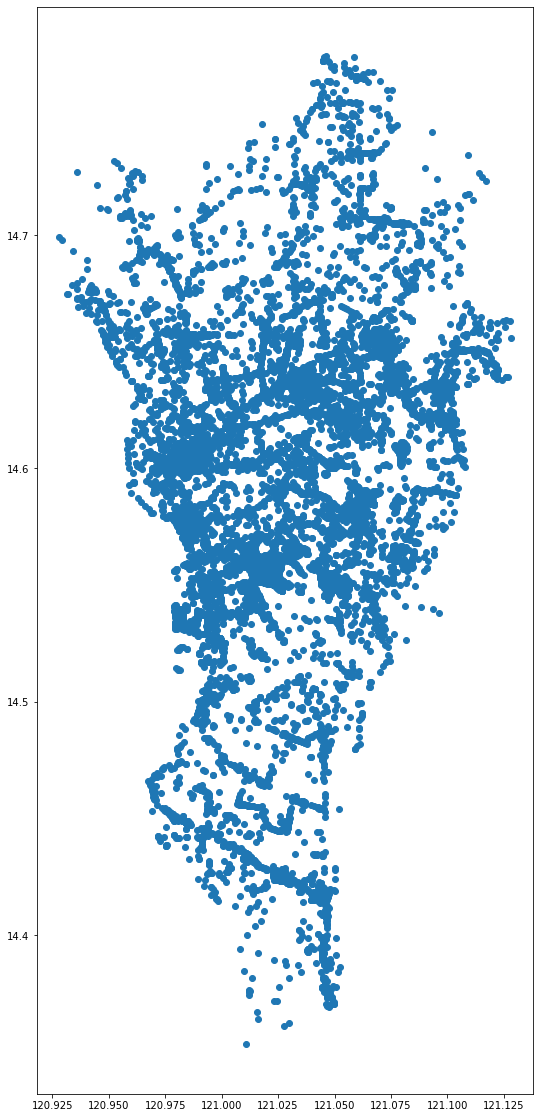

In [46]:
# Now lets visualize our mm_pts
mm_pts.plot(figsize=(20,20))

<AxesSubplot:>

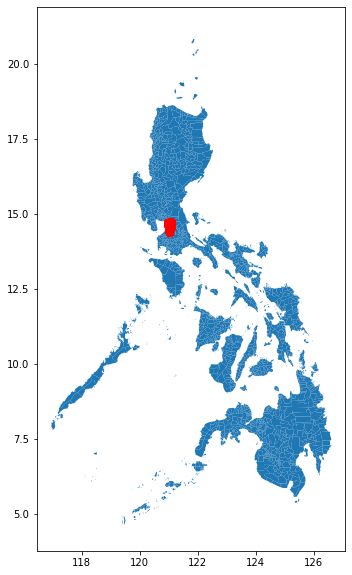

In [47]:
# Plotting our two objects together
ax = ph_shp.plot(figsize=(10,10))
mm_pts.plot(ax=ax, color = 'red')

<AxesSubplot:>

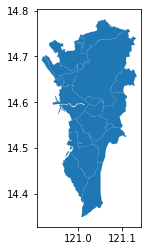

In [48]:
# Notice that we really can't see our points. We can use pandas functions to limit our scope to Metro Manila, mm_shp
mm_shp = ph_shp[ph_shp['name_1']=='Metropolitan Manila']
mm_shp.plot()

<AxesSubplot:>

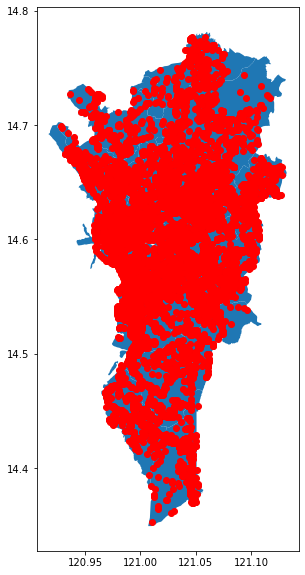

In [49]:
# Plotting our two objects together
ax = mm_shp.plot(figsize=(10,10))
mm_pts.plot(ax=ax, color = 'red')

<AxesSubplot:>

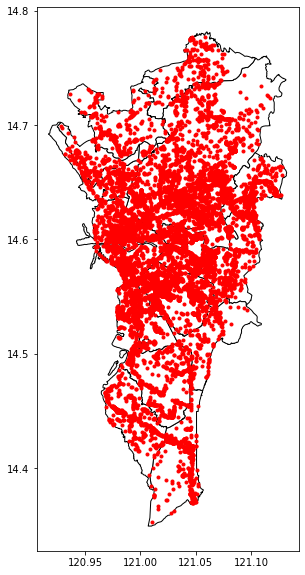

In [50]:
# This result is expected since we're visualizing a lot of points in this area. We can either vary the parameters of our plot:
ax = mm_shp.plot(figsize=(10,10), color = 'white', edgecolor='black')
mm_pts.plot(ax=ax, color = 'red', marker = '.')

<AxesSubplot:>

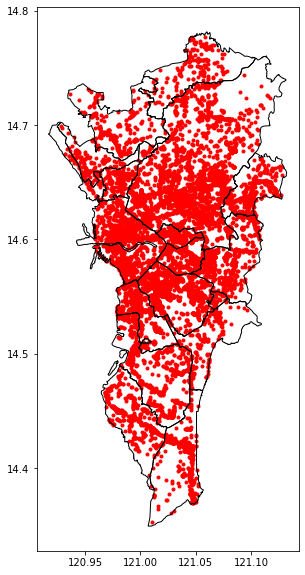

In [51]:
ax = mm_pts.plot(figsize=(10,10), color = 'red', marker = '.')
mm_shp.plot(ax=ax, facecolor = 'none', edgecolor='black')

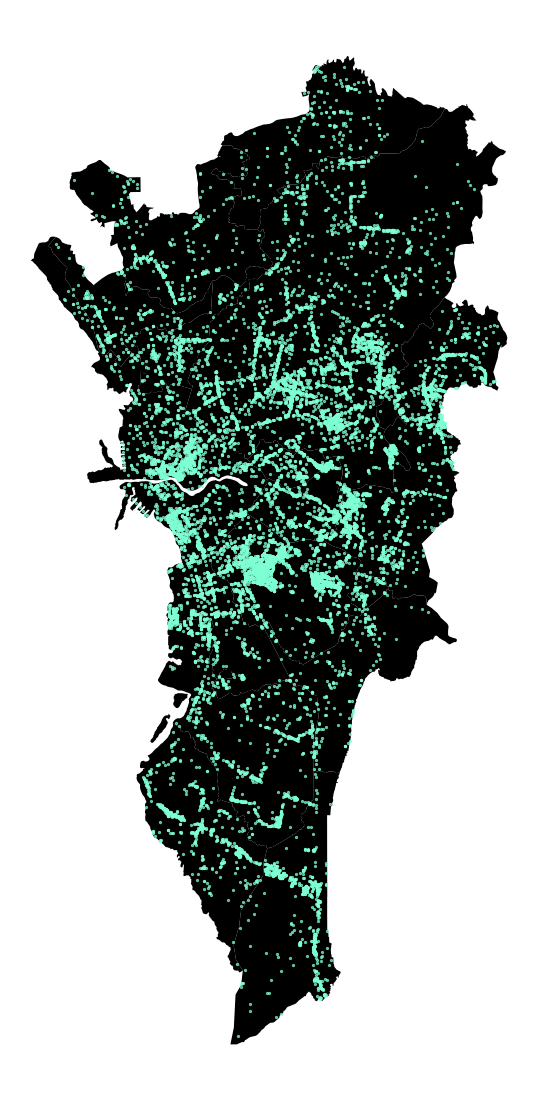

In [52]:
ax = mm_shp.plot(figsize = (20,20), color = 'black')
mm_pts.plot(ax = ax, color = 'aquamarine', markersize = 5, alpha = 0.7)
ax.set_axis_off()

In [53]:
# Or we can just filter our points based on what we are specifically looking for. Let's filter it out by 'school':
mm_school = mm_pts[mm_pts['amenity'] == 'school']
mm_school

,osm_id,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,...,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way
2,255058348,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06861 14.53961)
4,255071432,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06374 14.54548)
6,1993739420,None,None,540,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06692 14.54115)
22,1323171772,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06709 14.54335)
28,255065189,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.06726 14.54501)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14885,5309635413,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01940 14.70074)
14887,255049852,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (121.00379 14.71679)
14894,2525045404,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (120.95895 14.72395)
14895,2525045403,None,None,None,None,None,None,None,school,None,...,None,None,None,None,None,None,None,None,None,POINT (120.95854 14.72460)


<AxesSubplot:>

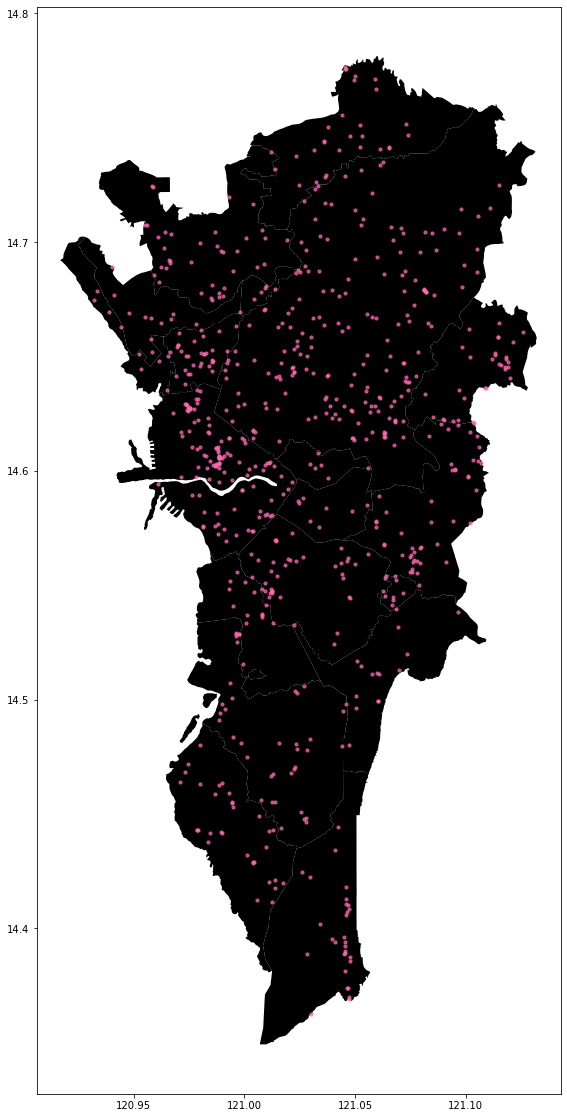

In [54]:
# Showing our school plot:
ax = mm_shp.plot(figsize = (20,20), color = 'black')
mm_school.plot(ax = ax, color = 'hotpink', markersize = 10, alpha = 0.7)


#### Note that this is where our Mapping Choices would matter. What would be a better way to map this?

### Exercise
Create a map that shows the restaurants within Makati City.

<AxesSubplot:>

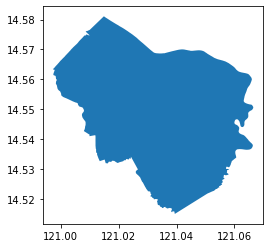

In [55]:
# Your Code Here
makati_shp = mm_shp[mm_shp['name_2'] == 'Makati City']
makati_shp.plot()

In [56]:
makati_shp = gpd.read_postgis(
'''
SELECT *
FROM gadm.ph_brgy
WHERE name_2 = 'Makati City'
'''
,con = conn, geom_col ='geom'
)
makati_shp

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,nl_name_2,gid_3,name_3,varname_3,nl_name_3,type_3,engtype_3,cc_3,hasc_3,geom
0,24564,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.1_1,Bangkal,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.01852 14.54415, 121.01809 ..."
1,24565,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.2_1,Bel-Air,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.03558 14.55826, 121.03478 ..."
2,24566,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.3_1,Carmona,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.01378 14.57440, 121.01385 ..."
3,24567,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.4_1,Cembo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.04842 14.56279, 121.04831 ..."
4,24568,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.5_1,Comembo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.06582 14.54963, 121.06567 ..."
5,24569,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.6_1,Dasmariñas,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.02420 14.53414, 121.02270 ..."
6,24570,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.7_1,East Rembo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.05642 14.54991, 121.05632 ..."
7,24571,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.8_1,Forbes Park,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.03905 14.55736, 121.03905 ..."
8,24572,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.9_1,Guadalupe Nuevo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.04181 14.56047, 121.04021 ..."
9,24573,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,None,PHL.47.3.10_1,Guadalupe Viejo,None,None,Barangay,Village,None,None,"MULTIPOLYGON (((121.03281 14.56430, 121.03275 ..."


In [57]:
makati_rest = gpd.read_postgis('''
SELECT p.*
FROM ph_point p
JOIN gadm.ph g ON st_within(p.way,g.geom)
WHERE p.amenity = 'restaurant' AND g.name_2 = 'Makati City'
''', conn, geom_col = 'way')
makati_rest

,osm_id,access,addr:housename,addr:housenumber,addr:interpolation,admin_level,aerialway,aeroway,amenity,area,...,tourism,tower:type,tunnel,water,waterway,wetland,width,wood,z_order,way
0,4730680638,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01209 14.54092)
1,4730680822,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01209 14.54124)
2,5441764222,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01229 14.54350)
3,244466926,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01858 14.53598)
4,1346621384,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.01783 14.53778)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,1437660247,None,Philplans Corporate Center,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.05635 14.56063)
674,1400573068,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.05731 14.56005)
675,4528435891,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.05080 14.56289)
676,4528435893,None,None,None,None,None,None,None,restaurant,None,...,None,None,None,None,None,None,None,None,None,POINT (121.05085 14.56292)


<AxesSubplot:>

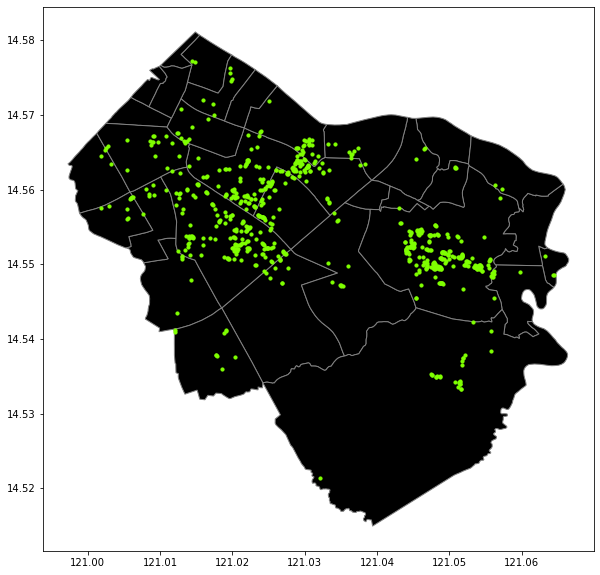

In [58]:
ax = makati_shp.plot(figsize = (10,10), color = 'black', edgecolor='grey')
makati_rest.plot(ax = ax, color = 'chartreuse', markersize = 10, alpha = 1)

### Merging Data

In [59]:
# Let's read our financial and population data from our last meeting 
fin_pop = pd.read_csv('financial_pop.csv')
fin_pop

,pop,tot_local_sources,tot_tax_revenue,tot_current_oper_income,total_oper_expenses,net_oper_income,total_non_income_receipts,capital_expenditure,total_non_oper_expenditures,cash_balance_end,shp_province,shp_municipality
0,48163.0,74.045920,36.556294,230.577076,206.848717,23.728359,0.0,16.202464,21.181116,15.758681,Abra,Bangued
1,3573.0,0.115667,0.035633,56.689883,54.409910,2.279973,0.0,0.000000,0.030000,20.369743,Abra,Boliney
2,17115.0,1.736411,1.019565,93.647242,66.222389,27.424853,0.0,19.560034,20.792182,6.632671,Abra,Bucay
3,2501.0,0.273689,0.129150,44.789104,29.633181,15.155923,0.0,0.479569,0.656569,24.348356,Abra,Bucloc
4,2088.0,0.643801,0.277660,51.242322,47.848486,3.393836,0.0,0.000000,0.000000,6.511575,Abra,Daguioman
...,...,...,...,...,...,...,...,...,...,...,...,...
1622,NaN,15.448920,5.801291,165.833472,116.742464,49.091008,0.0,30.375550,40.505854,29.068270,Camarines Sur,Tinambac
1623,NaN,3.881869,2.064453,59.176489,50.055428,9.121061,0.0,0.000000,0.000000,33.135557,Camarines Sur,Camaligan
1624,NaN,4.867135,2.615213,144.692431,100.076373,44.616059,0.0,0.502352,0.502352,106.534443,Camarines Sur,Lagonoy
1625,NaN,5.261260,1.360630,95.936120,61.682604,34.253516,0.0,13.592182,13.949405,40.976700,Camarines Sur,Balatan


In [60]:
# now let's merge it to our mm_shp
mm_data = mm_shp.merge(fin_pop, left_on = ['name_1','name_2'],
                       right_on = ['shp_province','shp_municipality'])
mm_data

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,...,tot_tax_revenue,tot_current_oper_income,total_oper_expenses,net_oper_income,total_non_income_receipts,capital_expenditure,total_non_oper_expenditures,cash_balance_end,shp_province,shp_municipality
0,973,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.13_1,Pateros,None,None,...,56.080847,201.599229,163.300161,38.299068,0.000000,1.482140,4.546140,62.811989,Metropolitan Manila,Pateros
1,974,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.14_1,Quezon City,None,None,...,12833.213830,18526.608000,9782.849320,8743.758684,0.000000,4860.912186,4860.912186,12761.512750,Metropolitan Manila,Quezon City
2,965,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.5_1,Mandaluyong,"Mandaluyong, City of",None,...,4851.641755,5862.396531,2960.364965,2902.031566,5.599664,102.726892,267.430004,3491.561763,Metropolitan Manila,Mandaluyong
3,966,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.6_1,Manila,"City of Manila|Manila, City of",None,...,8009.830859,11975.244480,7523.296121,4451.948361,266.429514,2287.001749,2347.412734,5701.646022,Metropolitan Manila,Manila
4,967,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.7_1,Marikina,"Marikina, City of",None,...,1008.797613,2366.331933,1606.966038,759.365894,338.653456,336.088870,422.780337,1347.965746,Metropolitan Manila,Marikina
5,968,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.8_1,Muntinlupa,"Muntinlupa, City of",None,...,2546.918961,4315.507771,2990.154537,1325.353234,0.000000,957.577746,1089.389596,995.435257,Metropolitan Manila,Muntinlupa
6,961,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.1_1,Kalookan City,None,None,...,2078.233727,4718.102455,2885.275622,1832.826833,372.406907,307.132984,548.347680,671.177751,Metropolitan Manila,Kalookan City
7,962,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.2_1,Las Piñas,"Las Piñas, City of",None,...,948.154753,2107.391432,1743.842711,363.548721,535.127365,126.072295,453.219048,1524.694001,Metropolitan Manila,Las Piñas
8,963,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.3_1,Makati City,"Makati, City of",None,...,11338.122110,13575.480700,7444.964790,6130.515909,0.000000,71.159205,479.640478,11126.810600,Metropolitan Manila,Makati City
9,964,PHL,Philippines,PHL.47_1,Metropolitan Manila,None,PHL.47.4_1,Malabon,None,None,...,406.027365,1254.476844,945.121196,309.355647,0.000000,189.269629,265.790960,465.910035,Metropolitan Manila,Malabon


<AxesSubplot:>

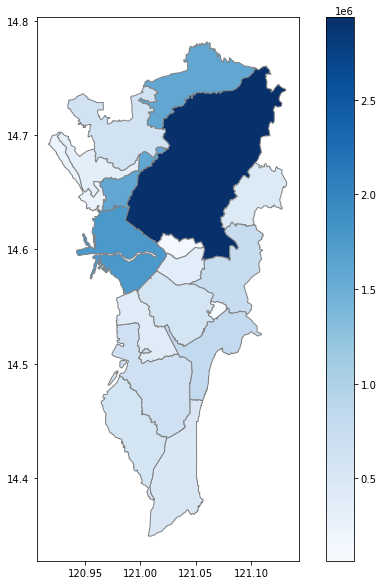

In [61]:
# Now we can use this table to create a choropleth map using population
mm_data.plot(column='pop', cmap='Blues', legend=True, figsize=(10,10), edgecolor='grey')

<AxesSubplot:>

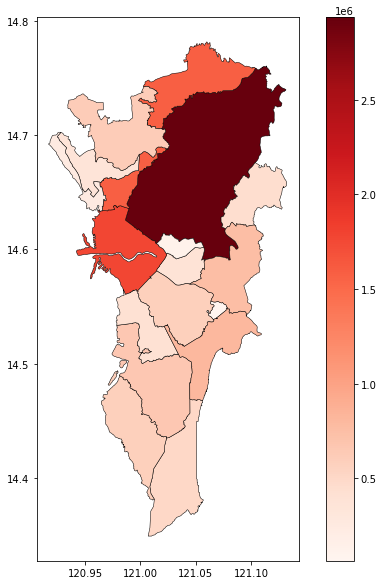

In [62]:
# Again, using matplotlib parameters, we can fix the map to make it more appealing:
mm_data.plot(column ='pop',
             figsize = (10,10),
             cmap = 'Reds',
             edgecolor = 'black',
             linewidth = 0.5,
            legend = True)

### Exercise : Create maps for:
1) Finding the peference of cities/municipalities between Jollibee and Mcdonalds. Use 'Metropolitan Manila' as a filter.

2) Visualizing the population density of each province.

3) Identifying the Cities/Municipalites within 14 km from Makati City.

#### Finding the preference of cities between jollibee and mcdonalds in MM

In [63]:
df_try = gpd.read_postgis("""
SELECT p.name, p.way, g.name_2, g.geom
FROM ph_point p
JOIN gadm.ph g ON st_within(p.way,g.geom)
WHERE g.name_1 = 'Metropolitan Manila'

""", conn, geom_col = 'way')
df_try.dropna(inplace=True)
df_try

,name,way,name_2,geom
1,Martirez del '96,POINT (121.06568 14.53973),Pateros,0106000020E610000001000000010300000001000000A3...
2,TK,POINT (121.06733 14.53969),Pateros,0106000020E610000001000000010300000001000000A3...
3,Motolite,POINT (121.06740 14.54007),Pateros,0106000020E610000001000000010300000001000000A3...
4,1896 Revolution,POINT (121.06742 14.54012),Pateros,0106000020E610000001000000010300000001000000A3...
5,Southern Rizal Institute,POINT (121.06861 14.53961),Pateros,0106000020E610000001000000010300000001000000A3...
...,...,...,...,...
41103,Shanelly pisonet,POINT (121.01061 14.73347),Valenzuela,0106000020E610000001000000010300000002000000DD...
41107,Paraiso Village,POINT (121.01373 14.73587),Valenzuela,0106000020E610000001000000010300000002000000DD...
41108,Noah Street,POINT (121.01334 14.73666),Valenzuela,0106000020E610000001000000010300000002000000DD...
41109,Deparo High School,POINT (121.01191 14.73954),Valenzuela,0106000020E610000001000000010300000002000000DD...


In [64]:
jm_counts = [df_try[df_try.name.str.lower().str.contains('jolli.*')].groupby('name_2')['name'].count(),
 df_try[df_try.name.str.lower().str.contains('mcdo.*')].groupby('name_2')['name'].count()]

In [65]:
df_jm_density = pd.DataFrame(jm_counts, index=['jollibee', 'mcdo']).T
df_jm_density['j-m ratio'] = df_jm_density['jollibee'] / (df_jm_density['jollibee'] + df_jm_density['mcdo'])
# df_jm_density = df_jm_density.reset_index()
df_jm_density = pd.concat([df_jm_density, mm_shp.dissolve('name_2')['geom']], axis=1).drop(['Navotas'])
df_jm_density.rename(columns={0:'geom'}, inplace=True)
df_jm_density = gpd.GeoDataFrame(df_jm_density, geometry='geom')
df_jm_density

,jollibee,mcdo,j-m ratio,geom
name_2,,,,
Kalookan City,9.0,3.0,0.750000,"MULTIPOLYGON (((120.98495 14.63705, 120.98466 ..."
Las Piñas,7.0,6.0,0.538462,"MULTIPOLYGON (((120.99380 14.41080, 120.99392 ..."
Makati City,25.0,21.0,0.543478,"POLYGON ((121.06578 14.53872, 121.06594 14.538..."
Malabon,4.0,2.0,0.666667,"POLYGON ((120.95800 14.65938, 120.95796 14.658..."
Mandaluyong,6.0,8.0,0.428571,"POLYGON ((121.05405 14.57747, 121.05408 14.577..."
Manila,42.0,27.0,0.608696,"POLYGON ((120.99142 14.56218, 120.98849 14.561..."
Marikina,11.0,4.0,0.733333,"POLYGON ((121.07346 14.61962, 121.07432 14.620..."
Muntinlupa,13.0,6.0,0.684211,"POLYGON ((121.02339 14.35760, 121.02313 14.357..."
Parañaque,15.0,7.0,0.681818,"MULTIPOLYGON (((121.00110 14.45587, 121.00110 ..."


**The more red, the larger the proportion of jollibees there are in the area than to Mcdonald's**

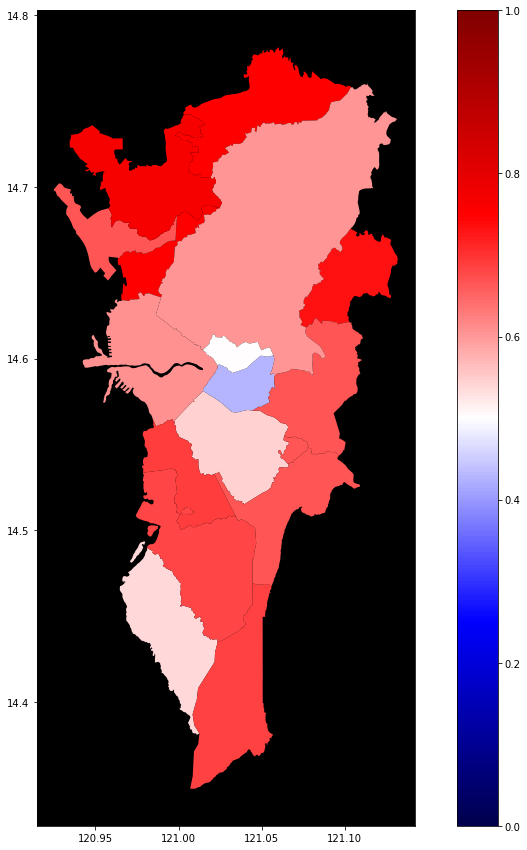

In [66]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()
ax.set_facecolor('black')
df_jm_density.plot(column='j-m ratio', cmap='seismic', legend=True, vmin=0, vmax=1, ax=ax)
plt.show()

It seems that Mandaluyong is the only area that has more Mcdonald's stores than Jollibee stores

In [67]:
df_jm_density['j-m ratio'].sort_values()

name_2
Mandaluyong      0.428571
San Juan         0.500000
Las Piñas        0.538462
Makati City      0.543478
Quezon City      0.603960
Manila           0.608696
Malabon          0.666667
Pasig City       0.666667
Pateros          0.666667
Taguig           0.666667
Parañaque        0.681818
Muntinlupa       0.684211
Pasay City       0.687500
Marikina         0.733333
Kalookan City    0.750000
Valenzuela       0.769231
Name: j-m ratio, dtype: float64

**Plotting Mcdonald's and Jollibees in Metro Manila**

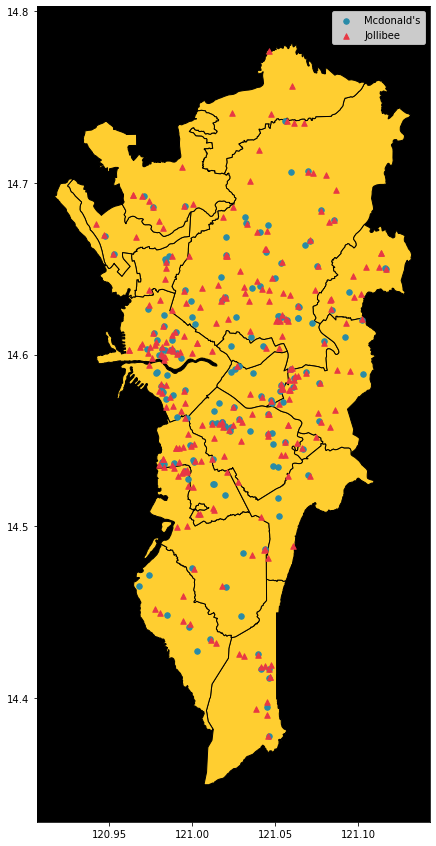

In [68]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_facecolor('black')
# df_mcdo = df_fastfood[(df_fastfood['name']=="Mcdonald's")]
# df_jollibee = df_fastfood[(df_fastfood['name']=='Jollibee')]

df_mcdo = gpd.GeoDataFrame(df_try[df_try.name.str.lower().str.contains('mcdo.*')], geometry='way')
df_jollibee = gpd.GeoDataFrame(df_try[df_try.name.str.lower().str.contains('jolli.*')], geometry='way')


mm_data.plot(ax=ax, color='#FFCE30', edgecolor='black')

df_mcdo.plot(ax=ax, markersize=30, color='#288BA8', label="Mcdonald's")
df_jollibee.plot(marker='^', ax=ax, markersize=30, color='#E83845', label='Jollibee')
plt.legend()
plt.show()

**Discussion**<br>
It seems that Metro Manila has a lot more Jollibee stores as compared to Mcdonald's stores. This suggests that Filipinos residing in Metro Manila prefer Jollibee over Mcdonald's. Only Las Pinas and Mandaluyong are the only areas that have less or equal Jollibee to Mcdonald's stores propotions. 

#### Visualizing the pop density for each province

In [69]:
df_pop_prov = ph_shp.merge(fin_pop, left_on='name_1', right_on='shp_province')
df_pop_prov

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,...,tot_tax_revenue,tot_current_oper_income,total_oper_expenses,net_oper_income,total_non_income_receipts,capital_expenditure,total_non_oper_expenditures,cash_balance_end,shp_province,shp_municipality
0,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,...,36.556294,230.577076,206.848717,23.728359,0.000000,16.202464,21.181116,15.758681,Abra,Bangued
1,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,...,0.035633,56.689883,54.409910,2.279973,0.000000,0.000000,0.030000,20.369743,Abra,Boliney
2,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,...,1.019565,93.647242,66.222389,27.424853,0.000000,19.560034,20.792182,6.632671,Abra,Bucay
3,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,...,0.129150,44.789104,29.633181,15.155923,0.000000,0.479569,0.656569,24.348356,Abra,Bucloc
4,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,...,0.277660,51.242322,47.848486,3.393836,0.000000,0.000000,0.000000,6.511575,Abra,Daguioman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43028,1575,PHL,Philippines,PHL.78_1,Zambales,None,PHL.78.14_1,Subic,None,None,...,6.144430,82.891635,64.624676,18.266959,8.721049,1.260080,17.100907,15.775452,Zambales,San Felipe
43029,1575,PHL,Philippines,PHL.78_1,Zambales,None,PHL.78.14_1,Subic,None,None,...,7.084757,162.048229,94.472805,67.575424,3.729630,12.513007,22.313646,93.025881,Zambales,San Marcelino
43030,1575,PHL,Philippines,PHL.78_1,Zambales,None,PHL.78.14_1,Subic,None,None,...,4.734222,80.433461,46.367472,34.065989,1.686447,0.067191,19.652854,61.798834,Zambales,San Narciso
43031,1575,PHL,Philippines,PHL.78_1,Zambales,None,PHL.78.14_1,Subic,None,None,...,14.509357,209.179579,124.507167,84.672412,42.402221,34.996838,60.365114,178.477069,Zambales,Santa Cruz


In [70]:
df_2 = df_pop_prov.groupby('name_1')['pop'].sum().to_frame()
df_2['area'] = ph_shp.dissolve('name_1')['geom'].to_crs(crs=3123).area.to_frame()
df_2['geom'] = ph_shp.dissolve('name_1')['geom']
df_2.loc['Camarines Sur','pop'] = 1
df_2.loc['Camarines Sur',:]

# df_2['area'] = np.log(df_2['area'])
df_2['density'] = df_2['pop']/df_2['area']
df_2['log_density'] = df_2['density'].apply(np.log)
df_2['scaled_density'] = (df_2['log_density'] - df_2['log_density'].min()) / (df_2['log_density'].max() - df_2['log_density'].min())
df_2

,pop,area,geom,density,log_density,scaled_density
name_1,,,,,,
Abra,6511320.0,3.971210e+09,"POLYGON ((120.67776 17.25863, 120.67325 17.260...",0.001640,-6.413284,0.744681
Agusan del Norte,8990358.0,3.010174e+09,"POLYGON ((125.42762 8.66017, 125.41774 8.66015...",0.002987,-5.813601,0.772629
Agusan del Sur,9809142.0,8.642606e+09,"POLYGON ((126.01767 7.94919, 126.01088 7.95357...",0.001135,-6.781145,0.727538
Aklan,9771991.0,1.664942e+09,"MULTIPOLYGON (((122.34997 11.43417, 122.34952 ...",0.005869,-5.138025,0.804113
Albay,24981694.0,2.518459e+09,"MULTIPOLYGON (((123.81173 13.05423, 123.81221 ...",0.009919,-4.613259,0.828569
...,...,...,...,...,...,...
Tawi-Tawi,4297865.0,1.180580e+09,"MULTIPOLYGON (((119.46722 4.59056, 119.46750 4...",0.003640,-5.615642,0.781855
Zambales,11534432.0,3.656670e+09,"MULTIPOLYGON (((120.08236 14.75132, 120.08257 ...",0.003154,-5.758971,0.775175
Zamboanga Sibugay,10130064.0,2.716857e+09,"MULTIPOLYGON (((122.85994 7.27388, 122.85982 7...",0.003729,-5.591723,0.782969


In [71]:
df_2_new = gpd.GeoDataFrame(df_2, geometry='geom')
df_2_new

,pop,area,geom,density,log_density,scaled_density
name_1,,,,,,
Abra,6511320.0,3.971210e+09,"POLYGON ((120.67776 17.25863, 120.67325 17.260...",0.001640,-6.413284,0.744681
Agusan del Norte,8990358.0,3.010174e+09,"POLYGON ((125.42762 8.66017, 125.41774 8.66015...",0.002987,-5.813601,0.772629
Agusan del Sur,9809142.0,8.642606e+09,"POLYGON ((126.01767 7.94919, 126.01088 7.95357...",0.001135,-6.781145,0.727538
Aklan,9771991.0,1.664942e+09,"MULTIPOLYGON (((122.34997 11.43417, 122.34952 ...",0.005869,-5.138025,0.804113
Albay,24981694.0,2.518459e+09,"MULTIPOLYGON (((123.81173 13.05423, 123.81221 ...",0.009919,-4.613259,0.828569
...,...,...,...,...,...,...
Tawi-Tawi,4297865.0,1.180580e+09,"MULTIPOLYGON (((119.46722 4.59056, 119.46750 4...",0.003640,-5.615642,0.781855
Zambales,11534432.0,3.656670e+09,"MULTIPOLYGON (((120.08236 14.75132, 120.08257 ...",0.003154,-5.758971,0.775175
Zamboanga Sibugay,10130064.0,2.716857e+09,"MULTIPOLYGON (((122.85994 7.27388, 122.85982 7...",0.003729,-5.591723,0.782969


<AxesSubplot:>

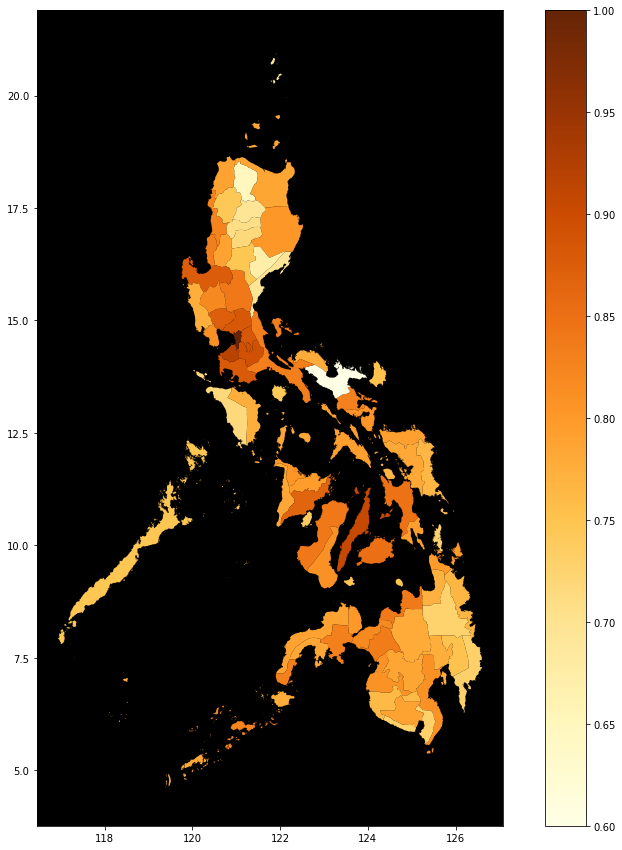

In [72]:
fig = plt.figure(figsize=(15,15))
ax = plt.axes()
ax.set_facecolor('black')
df_2_new.plot(column='scaled_density', cmap='YlOrBr', legend=True, ax=ax, vmin=0.6)

As expected Metro Manila has the most population density in the whole country. Similar dense areas belong to some areas in luzon and visayas. It is important to note that the data suggests that population is zero in Camarines Sur which explains its white color. In addition, the metric used here is a scaled log transformation of the population density to appropriately visualize the differences per region.

####  Identifying the Cities/Municipalites within 14 km from Makati City.

In [73]:
df_3 = gpd.read_postgis("""

SELECT g1.name_2, g2.name_2, g2.engtype_2, g2.geom
FROM gadm.ph g1
JOIN gadm.ph g2 
ON ST_DWITHIN(ST_TRANSFORM(g1.geom, 3123), ST_TRANSFORM(g2.geom, 3123), 14000)
WHERE g1.name_2 = 'Makati City' AND (g2.engtype_2 = 'Municipality' OR g2.engtype_2 = 'City') 
""", con=conn, geom_col='geom')
df_3

,name_2,name_2,engtype_2,geom
0,Makati City,Angono,Municipality,"MULTIPOLYGON (((121.15926 14.52012, 121.15665 ..."
1,Makati City,Obando,Municipality,"MULTIPOLYGON (((120.95783 14.68747, 120.95775 ..."
2,Makati City,Bacoor,Municipality,"MULTIPOLYGON (((120.98454 14.36196, 120.97490 ..."
3,Makati City,Cavite City,City,"MULTIPOLYGON (((120.87695 14.45306, 120.87722 ..."
4,Makati City,Imus,Municipality,"MULTIPOLYGON (((120.91850 14.35753, 120.91826 ..."
5,Makati City,Kawit,Municipality,"MULTIPOLYGON (((120.89316 14.42352, 120.88914 ..."
6,Makati City,Pateros,City,"MULTIPOLYGON (((121.06864 14.53992, 121.06883 ..."
7,Makati City,Quezon City,City,"MULTIPOLYGON (((121.01576 14.60610, 121.01511 ..."
8,Makati City,Mandaluyong,City,"MULTIPOLYGON (((121.05405 14.57747, 121.05408 ..."
9,Makati City,Manila,City,"MULTIPOLYGON (((120.99142 14.56218, 120.98849 ..."


In [74]:
df_3['coords'] = df_3['geom'].apply(lambda x: x.representative_point().coords[:])
df_3['coords'] = [coords[0] for coords in df_3['coords']]

In [75]:
df_3

,name_2,name_2,engtype_2,geom,coords
0,Makati City,Angono,Municipality,"MULTIPOLYGON (((121.15926 14.52012, 121.15665 ...","(121.16962645314842, 14.54557991)"
1,Makati City,Obando,Municipality,"MULTIPOLYGON (((120.95783 14.68747, 120.95775 ...","(120.92403831003008, 14.713570115)"
2,Makati City,Bacoor,Municipality,"MULTIPOLYGON (((120.98454 14.36196, 120.97490 ...","(120.97194117690981, 14.416453839999999)"
3,Makati City,Cavite City,City,"MULTIPOLYGON (((120.87695 14.45306, 120.87722 ...","(120.89228974035592, 14.47597027)"
4,Makati City,Imus,Municipality,"MULTIPOLYGON (((120.91850 14.35753, 120.91826 ...","(120.93400795908843, 14.398990155)"
5,Makati City,Kawit,Municipality,"MULTIPOLYGON (((120.89316 14.42352, 120.88914 ...","(120.89815600688263, 14.44132519)"
6,Makati City,Pateros,City,"MULTIPOLYGON (((121.06864 14.53992, 121.06883 ...","(121.07091340319127, 14.546780590000001)"
7,Makati City,Quezon City,City,"MULTIPOLYGON (((121.01576 14.60610, 121.01511 ...","(121.0564453485471, 14.674670695)"
8,Makati City,Mandaluyong,City,"MULTIPOLYGON (((121.05405 14.57747, 121.05408 ...","(121.03753064862448, 14.585350510000001)"
9,Makati City,Manila,City,"MULTIPOLYGON (((120.99142 14.56218, 120.98849 ...","(120.98355502586293, 14.59954214)"


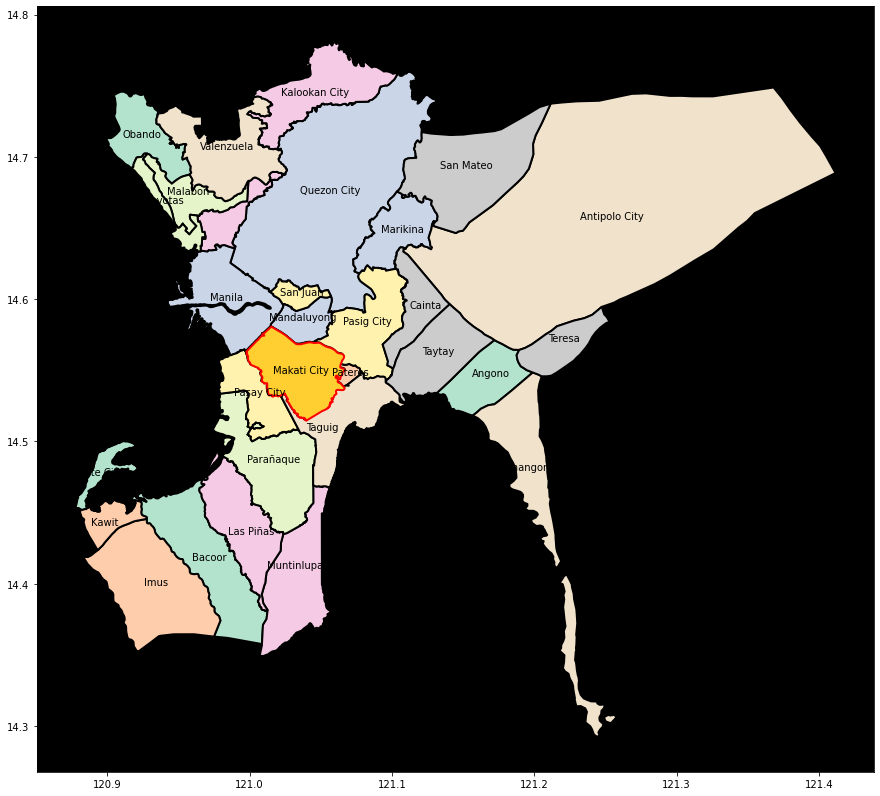

In [77]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_facecolor('Black')
# mm_shp.plot(ax=ax, color='black', )



df_3.plot(ax=ax, cmap='Pastel2', linewidth=2, edgecolor='black')
gpd.GeoDataFrame(df_3.iloc[14].to_frame().T, geometry='geom').plot(ax=ax, color='#FFCE30', linewidth=2, edgecolor='red')
for idx, row in df_3.iloc[:,1:].iterrows():
    plt.annotate(text=row['name_2'], xy=row['coords'],
                 horizontalalignment='center')
    
# makati_shp.plot(ax=ax, color='#FFCE30', label='Makati City', edgecolor='#FFCE30', linewidth=1)
plt.show()

There are a total of 28 cities/municipalities that are 14 kilometers from Makati City.